<h1>Geographical Analysis of Policy Data</h1>

<b>Tasks:</b>
<ol>
<li>Investigate the completeness of the data set, to identify how much missing data there is</li>
<li>Convert the date to datetime values</li>
<li>Convert the data to a geopanda to plot on a map<\li>
<li>Plot a Chloropleth of the Stringency Index by country for a particular day</li>

In [1]:
import pandas as pd
import geopandas as gpd
url1 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
url2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest_withnotes.csv'
latest = pd.read_csv(url1)
latest.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0


This is analysis to identify where there is most missing data

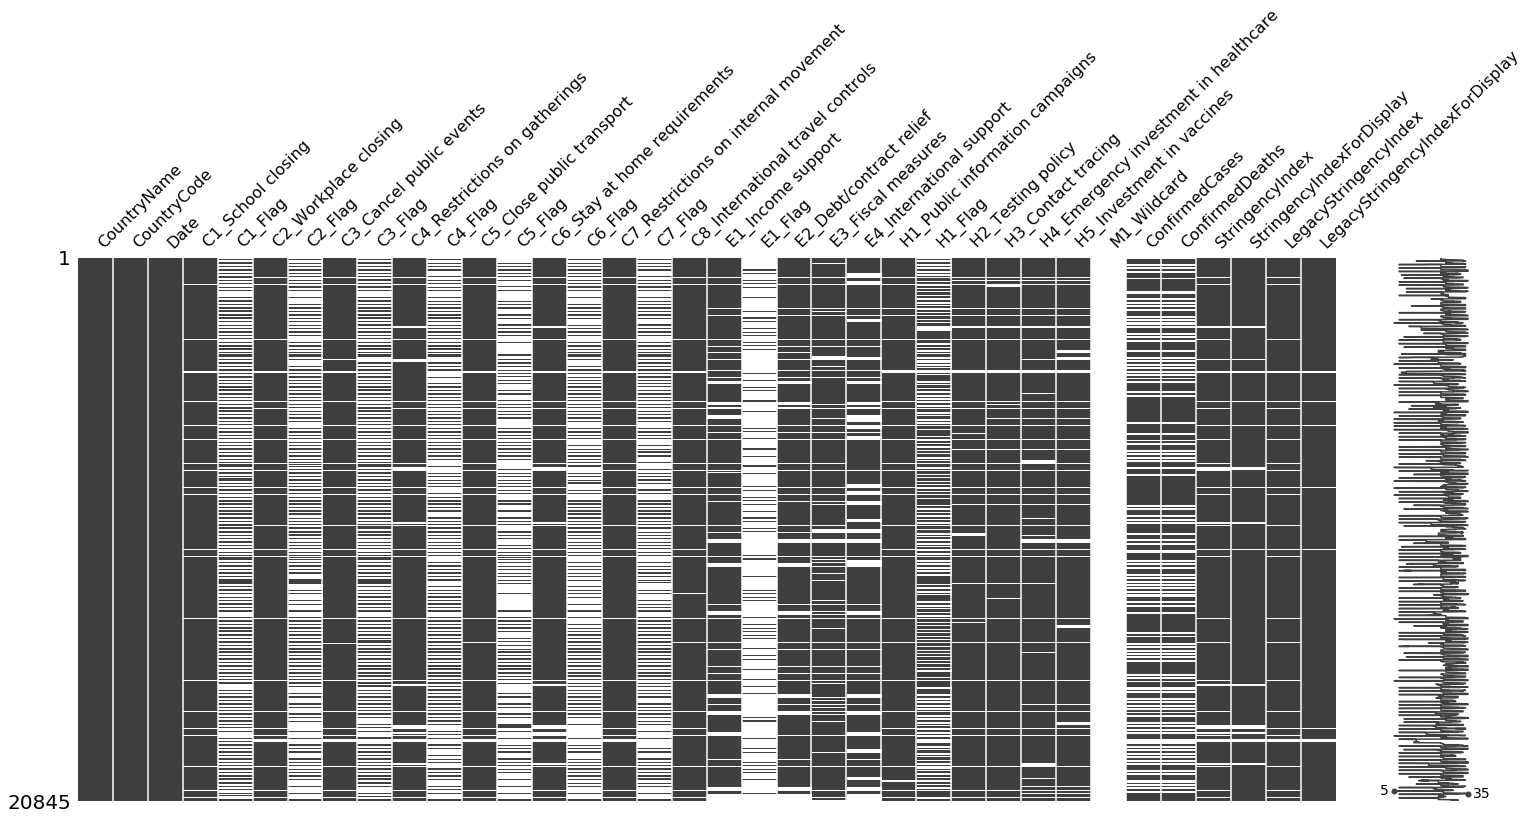

In [2]:
import missingno as msno
msno.matrix(latest)

We convert the date column to a date time

In [3]:
def convert_date(date):
    num = date
    year = num[0:4]
    month = num[4:6]
    day = num[6:8]
    return str(year+"-"+month+"-"+day)


In [4]:
latest['Date'] = latest['Date'].apply(lambda x: convert_date(str(x)))

In [5]:
latest['Date']=pd.to_datetime(latest['Date'])
latest.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
0,Aruba,ABW,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,Aruba,ABW,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,Aruba,ABW,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,Aruba,ABW,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,Aruba,ABW,2020-01-05,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0


We import country polygons from geopandas

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


We rename the column Country Code to iso_a3 so that we can merge the geopandas with the latest dataframe

In [7]:
latest.rename(columns={'CountryCode':'iso_a3'}, inplace=True)

We select a date in april for which there is less null value

In [8]:
latest_april = latest[latest['Date']=='2020-03-20']
latest_april.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 79 to 20792
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   CountryName                            158 non-null    object        
 1   iso_a3                                 158 non-null    object        
 2   Date                                   158 non-null    datetime64[ns]
 3   C1_School closing                      157 non-null    float64       
 4   C1_Flag                                138 non-null    float64       
 5   C2_Workplace closing                   156 non-null    float64       
 6   C2_Flag                                97 non-null     float64       
 7   C3_Cancel public events                157 non-null    float64       
 8   C3_Flag                                141 non-null    float64       
 9   C4_Restrictions on gatherings          154 non-null    float64

In [9]:
latest_april.head()

,CountryName,iso_a3,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
79,Aruba,ABW,2020-03-20,3.0,1.0,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,4.0,0.0,30.56,30.56,37.14,37.14
211,Afghanistan,AFG,2020-03-20,3.0,1.0,0.0,NaN,2.0,1.0,0.0,...,1.0,0.0,0.0,NaN,22.0,0.0,36.11,36.11,45.71,45.71
343,Angola,AGO,2020-03-20,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,11.11,11.11,11.43,11.43
475,Albania,ALB,2020-03-20,3.0,1.0,2.0,0.0,2.0,1.0,2.0,...,1.0,25000000.0,0.0,NaN,70.0,2.0,84.39,84.39,85.24,85.24
607,Andorra,AND,2020-03-20,3.0,1.0,3.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,NaN,75.0,0.0,35.18,35.18,45.24,45.24


In [10]:
latest_april.set_index('iso_a3', inplace=True)
latest_april.head()

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
iso_a3,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,2020-03-20,3.0,1.0,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,NaN,4.0,0.0,30.56,30.56,37.14,37.14
AFG,Afghanistan,2020-03-20,3.0,1.0,0.0,NaN,2.0,1.0,0.0,NaN,...,1.0,0.0,0.0,NaN,22.0,0.0,36.11,36.11,45.71,45.71
AGO,Angola,2020-03-20,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,11.11,11.11,11.43,11.43
ALB,Albania,2020-03-20,3.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,...,1.0,25000000.0,0.0,NaN,70.0,2.0,84.39,84.39,85.24,85.24
AND,Andorra,2020-03-20,3.0,1.0,3.0,1.0,1.0,1.0,0.0,NaN,...,0.0,0.0,0.0,NaN,75.0,0.0,35.18,35.18,45.24,45.24


We create the GeoDataFrame so that we can plot the data using folium

In [11]:
map_april =world.merge(latest_april, on='iso_a3')

In [12]:
map_april.set_index('iso_a3', inplace=True)

In [13]:
map_april.head()

,pop_est,continent,name,gdp_md_est,geometry,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,...,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,M1_Wildcard,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay
iso_a3,,,,,,,,,,,,,,,,,,,,,
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2020-03-20,3.0,1.0,0.0,...,1.0,0.0,0.0,NaN,3.0,0.0,34.13,34.13,31.43,31.43
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2020-03-20,3.0,1.0,3.0,...,1.0,562.0,191.0,NaN,846.0,10.0,74.74,74.74,72.86,72.86
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2020-03-20,3.0,0.0,3.0,...,1.0,0.0,0.0,NaN,14250.0,150.0,64.44,64.44,68.10,68.10
KAZ,18556698,Asia,Kazakhstan,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2020-03-20,3.0,1.0,0.0,...,0.0,0.0,0.0,NaN,49.0,0.0,76.20,76.20,74.52,74.52
UZB,29748859,Asia,Uzbekistan,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,2020-03-20,3.0,1.0,2.0,...,2.0,52356020.0,0.0,NaN,23.0,0.0,60.85,60.85,74.52,74.52


We plot a historgram of the frequencies of each stringency level for the countries we have data.

Text(0.5, 0, 'Stringeny Index')

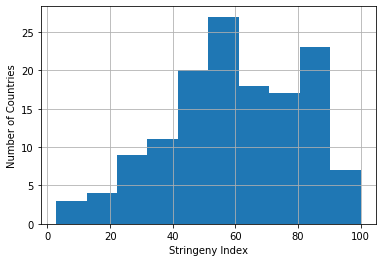

In [14]:
ax = map_april['StringencyIndexForDisplay'].hist()
ax.set_ylabel('Number of Countries')
ax.set_xlabel('Stringeny Index')


We plot the Stringency Index of each country on a map, shaded according to the level of Stringency

In [15]:
import folium
from folium import Choropleth, Circle, Marker
#from folium.plugins import HeatMap, MarkerCluster

In [16]:
m = folium.Map(location=[30,0], zoom_start=2)

Choropleth(geo_data=map_april['geometry'].__geo_interface__,
           data=map_april['StringencyIndexForDisplay'],
           key_on='feature.id', 
           fill_color='BuPu',
           fill_opacity=0.7,
           line_opacity=0.2,
           legend_name='Stringency Index'
          ).add_to(m)
m